<a href="https://colab.research.google.com/github/HIzadi1/Ensemple_Bagging_RandomForest/blob/master/Ensemble_Bagging_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ensemble, Bagging and Random Forest:**

This Notebook studies how the *decision trees* are used for regression problems and how using *ensemble* and *bagging* techniques on decision tress lead to *Random Forest* algorithm and how it improves the performance of a single decision tree.


**Pipeline Overview** 

Most of the ML problems can be solved using this generic pipeline:

1) Importing dependencies and required libraries.

2) Importing data

3) Visualizing data

4) Preprocessing data

5) Feature extraction/engineering

6) Structuring/Selecting the model e.g. decision trees, neural networks

7) Training the model

8) Testing the model

**Importing Dependencies**

In [0]:
# import dependencies for data processing
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 10]
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

#google drive api independencies
#!pip install -U -q PyDrive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials
#authenticatation
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

**Importing** **Data** 

The data from https://www.kaggle.com/c/nyc-taxi-trip-duration competition is used for this study:

In [29]:
# import data from disk
from google.colab import files
uploaded = files.upload()

import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

#train.head()   #ploting the top rows
train.tail()    #ploting the end rows 

Saving train.csv to train (1).csv


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
336807,id1156045,2,1/27/2016 10:27,1/27/2016 10:35,1,-73.980995,40.765984,-73.989311,40.769451,N,529
336808,id2782326,2,2/6/2016 12:40,2/6/2016 12:46,1,-73.972519,40.749870,-73.974709,40.758129,N,367
336809,id3827083,2,4/25/2016 16:51,4/25/2016 17:00,2,-73.994164,40.726551,-74.004646,40.746941,N,579
336810,id2891581,2,4/10/2016 18:02,4/10/2016 18:31,1,-73.982628,40.772221,-73.991455,40.714825,N,1711
336811,id3412806,1,2/24/2016 22:53,2/24/2016 23:06,1,-73.976631,40.750755,-73.955704,40.776230,N,777


**Visualizing and preprocessing the data**

These 2 are normally done to assess the quality and quantity of data, and modify them if reuired. For example, data normaliation is done to bring the data to acceptable small ranges such as [-1,+1], to make the model deal with small numbers, and hence making computations lighter.

Text(0, 0.5, '# of trips')

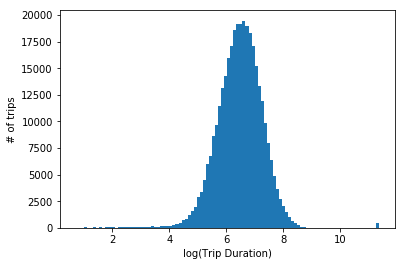

In [30]:
# using log of output lets the model to deal with small number and 
# then train better on data
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)
plt.hist(train['log_trip_duration'].values, bins=100)
plt.xlabel('log(Trip Duration)')
plt.ylabel('# of trips')

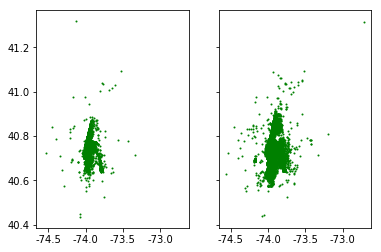

In [31]:
n=100000 # select a subset of data
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(train['pickup_longitude'].values[:n],train['pickup_latitude'].values[:n], 
color='green', s=1, label='train') 
ax[1].scatter(train['dropoff_longitude'].values[:n],train['dropoff_latitude'].values[:n], 
color='green', s=1, label='train') 
plt.show()

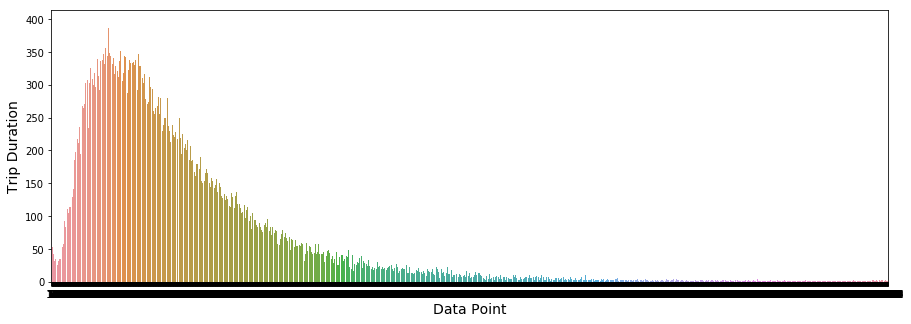

In [27]:
f = plt.figure(figsize=(15,5))
sns.countplot(x='trip_duration', data=train)
plt.xlabel('Data Point', fontsize=14)
plt.ylabel('Trip Duration', fontsize=14)
plt.show()

**Feature Extraction:**

As an example pick time is extracted from the data as a feature:

In [32]:
train["pickup_hour"] = [t.hour for t in pd.DatetimeIndex(train.pickup_datetime)]
train.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_hour
0,id2875421,2,3/14/2016 17:24,3/14/2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,17
1,id2377394,1,6/12/2016 0:43,6/12/2016 0:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,0


In [33]:
y = train["log_trip_duration"]
X = train[['pickup_hour','pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']] 	
X.sample()

# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_train.sample()

,pickup_hour,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
251955,19,-73.993477,40.740131,-74.000092,40.734779


**Model Selection and Structuring**
In general is a big task that comes with experience. Normally it follows the "No Free Lunch Theorem", which means there's no single model/algorithm that's good for problems. For the purpose of this study we start with decision trees.

**1- Decision Tree Method**

In [34]:
from sklearn import tree 

# Make a decision tree model and train
tree_model = tree.DecisionTreeRegressor(max_depth = 100, random_state=40)  

tree_model = tree_model.fit(X_train, y_train) 

# Analyzing Accuracies
print(f'Training Accuracy: {tree_model.score(X_train, y_train)}')
print(f'Test Accuracy: {tree_model.score(X_test, y_test)}')


Training Accuracy: 0.9999999999233692
Test Accuracy: 0.372901071001295


The model has a high accuracy of almost 100% on the training data but a poor accuracy of 37% on the test data. This is a clear indication of overfitting, which is the main cons of decision trees. 

**Visualizing the model**

To get some idea about how the mddel works the code below can be used. The most imprtant parameter in decision trees is the giny impurity parameter that indicates the liklihood of a sample being wrongly classified if the distribution of the samples at that node is used. Giny must decrease from root to leaf nodes.

In [0]:
import graphviz 
dot_data = tree.export_graphviz(tree_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Data_train")
data = tree.export_graphviz(tree_model, out_file=None,filled=True,rounded=True, special_characters=True)
#...                      feature_names=X_train.feature_names,  
#...                      class_names=X_train.target_names,  
#...              filled=True, rounded=True, special_characters=True) 


#graph = graphviz.Source(data)  
#graph 



> 
>


**2- Random Forest = Ensemble (Combination of Decision Trees) + Bagging + Feature Subsetting**

Overfitting is the main problem of Decision Trees. Since no depth is specified, it can keep growing until it has only one leaf node for every single observation, perfectly classifying all of them, which leads to memorizing all the training data, but not enough capability to generalize its learnings. 
Random Forest solves this problem through using many decision tress, instead of one that are trained on random sample of data, and finally combining - ensembling- these small decision tree models through averaging.
>>
Random forest has 3 main elements:
1) Ensemble: Model is composed of hundreds of individual decision trees.
2) Bagging: a subset of samples are used to train each individual model (generated by bootstraping)
3) Training each model on a random subset of features (normally sqrt(n), n being the number of features)


Random Forest Parameter Tuning:

n_estimtor and max_features are the main parameters to tune. For reqression problems max_features should be equal to the number of features (which makes the random forest the same as bagging), however, for classification problems it should be equal to sqrt(number of features). A higher value increases the bias and reduces the variance.


n_jobs defines the nomber of computation cores being used for the sake of parallel computation 

In [35]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=50, max_features=5, 
                             min_samples_leaf=4, min_samples_split=2,
                             max_depth=None, bootstrap=True,
                             n_jobs=-1, random_state=40)
RFR.fit(X, y)

#print(RFR.predict([[0, 0, 0, 0]]))
print(f'Training Accuracy: {RFR.score(X_train, y_train)}')
print(f'Test Accuracy: {RFR.score(X_test, y_test)}')

Training Accuracy: 0.8598010772007656
Test Accuracy: 0.856884397213319


The accuracy of about 85% for both training and test data suggest that the random forest model solves the overfitting problem of decision trees.

and here's a useful method to get some idea about the importance of each feature:

In [36]:
print(RFR.feature_importances_)

[0.05225422 0.24779373 0.27168294 0.22678733 0.20148177]


This analysis says that the pick time has an importance of 5% while the pick up/dropp off location features have importance in the order of 20%, which basically says that the pick up time is not really as important as pick up/drop off location in New York.  



---



---



---



Next to be added: Gradient Boosting, XGB,...

---


